<a href="https://colab.research.google.com/github/dnbrk13/danasrepo/blob/main/capstone_project_outpeer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЗАДАЧА ПРОГРАММИРОВАНИЯ #1: ИМПОРТ БИБЛИОТЕК/НАБОРОВ ДАННЫХ И ВЫПОЛНЕНИЕ ИССЛЕДОВАТЕЛЬСКОГО АНАЛИЗА ДАННЫХ

In [1]:
import numpy as np # Multi-dimensional array manipulation
import pandas as pd # DataFrame Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
from sklearn import metrics


In [3]:
# чтение CSV file
telecom_df = pd.read_csv("telecom_churn.csv")

In [5]:
# Загрузка 5 лучших экземпляров
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [6]:
# Загрузите нижние 5 экземпляров
telecom_df.tail()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,46,86,415,2412,0,1,34,129.4,102,22.00,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


In [7]:
# Проверка формы кадра данных
telecom_df.shape

(5000, 21)

In [8]:
# Отображение столбцов функций
telecom_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [9]:
# Получение сводки по типам данных кадра данных
telecom_df.dtypes

,0
state,int64
account_length,int64
area_code,int64
phone_number,int64
international_plan,int64
voice_mail_plan,int64
number_vmail_messages,int64
total_day_minutes,float64
total_day_calls,int64
total_day_charge,float64


 ВЫПОЛНЕНИЕ ВИЗУАЛИЗАЦИИ ДАННЫХ

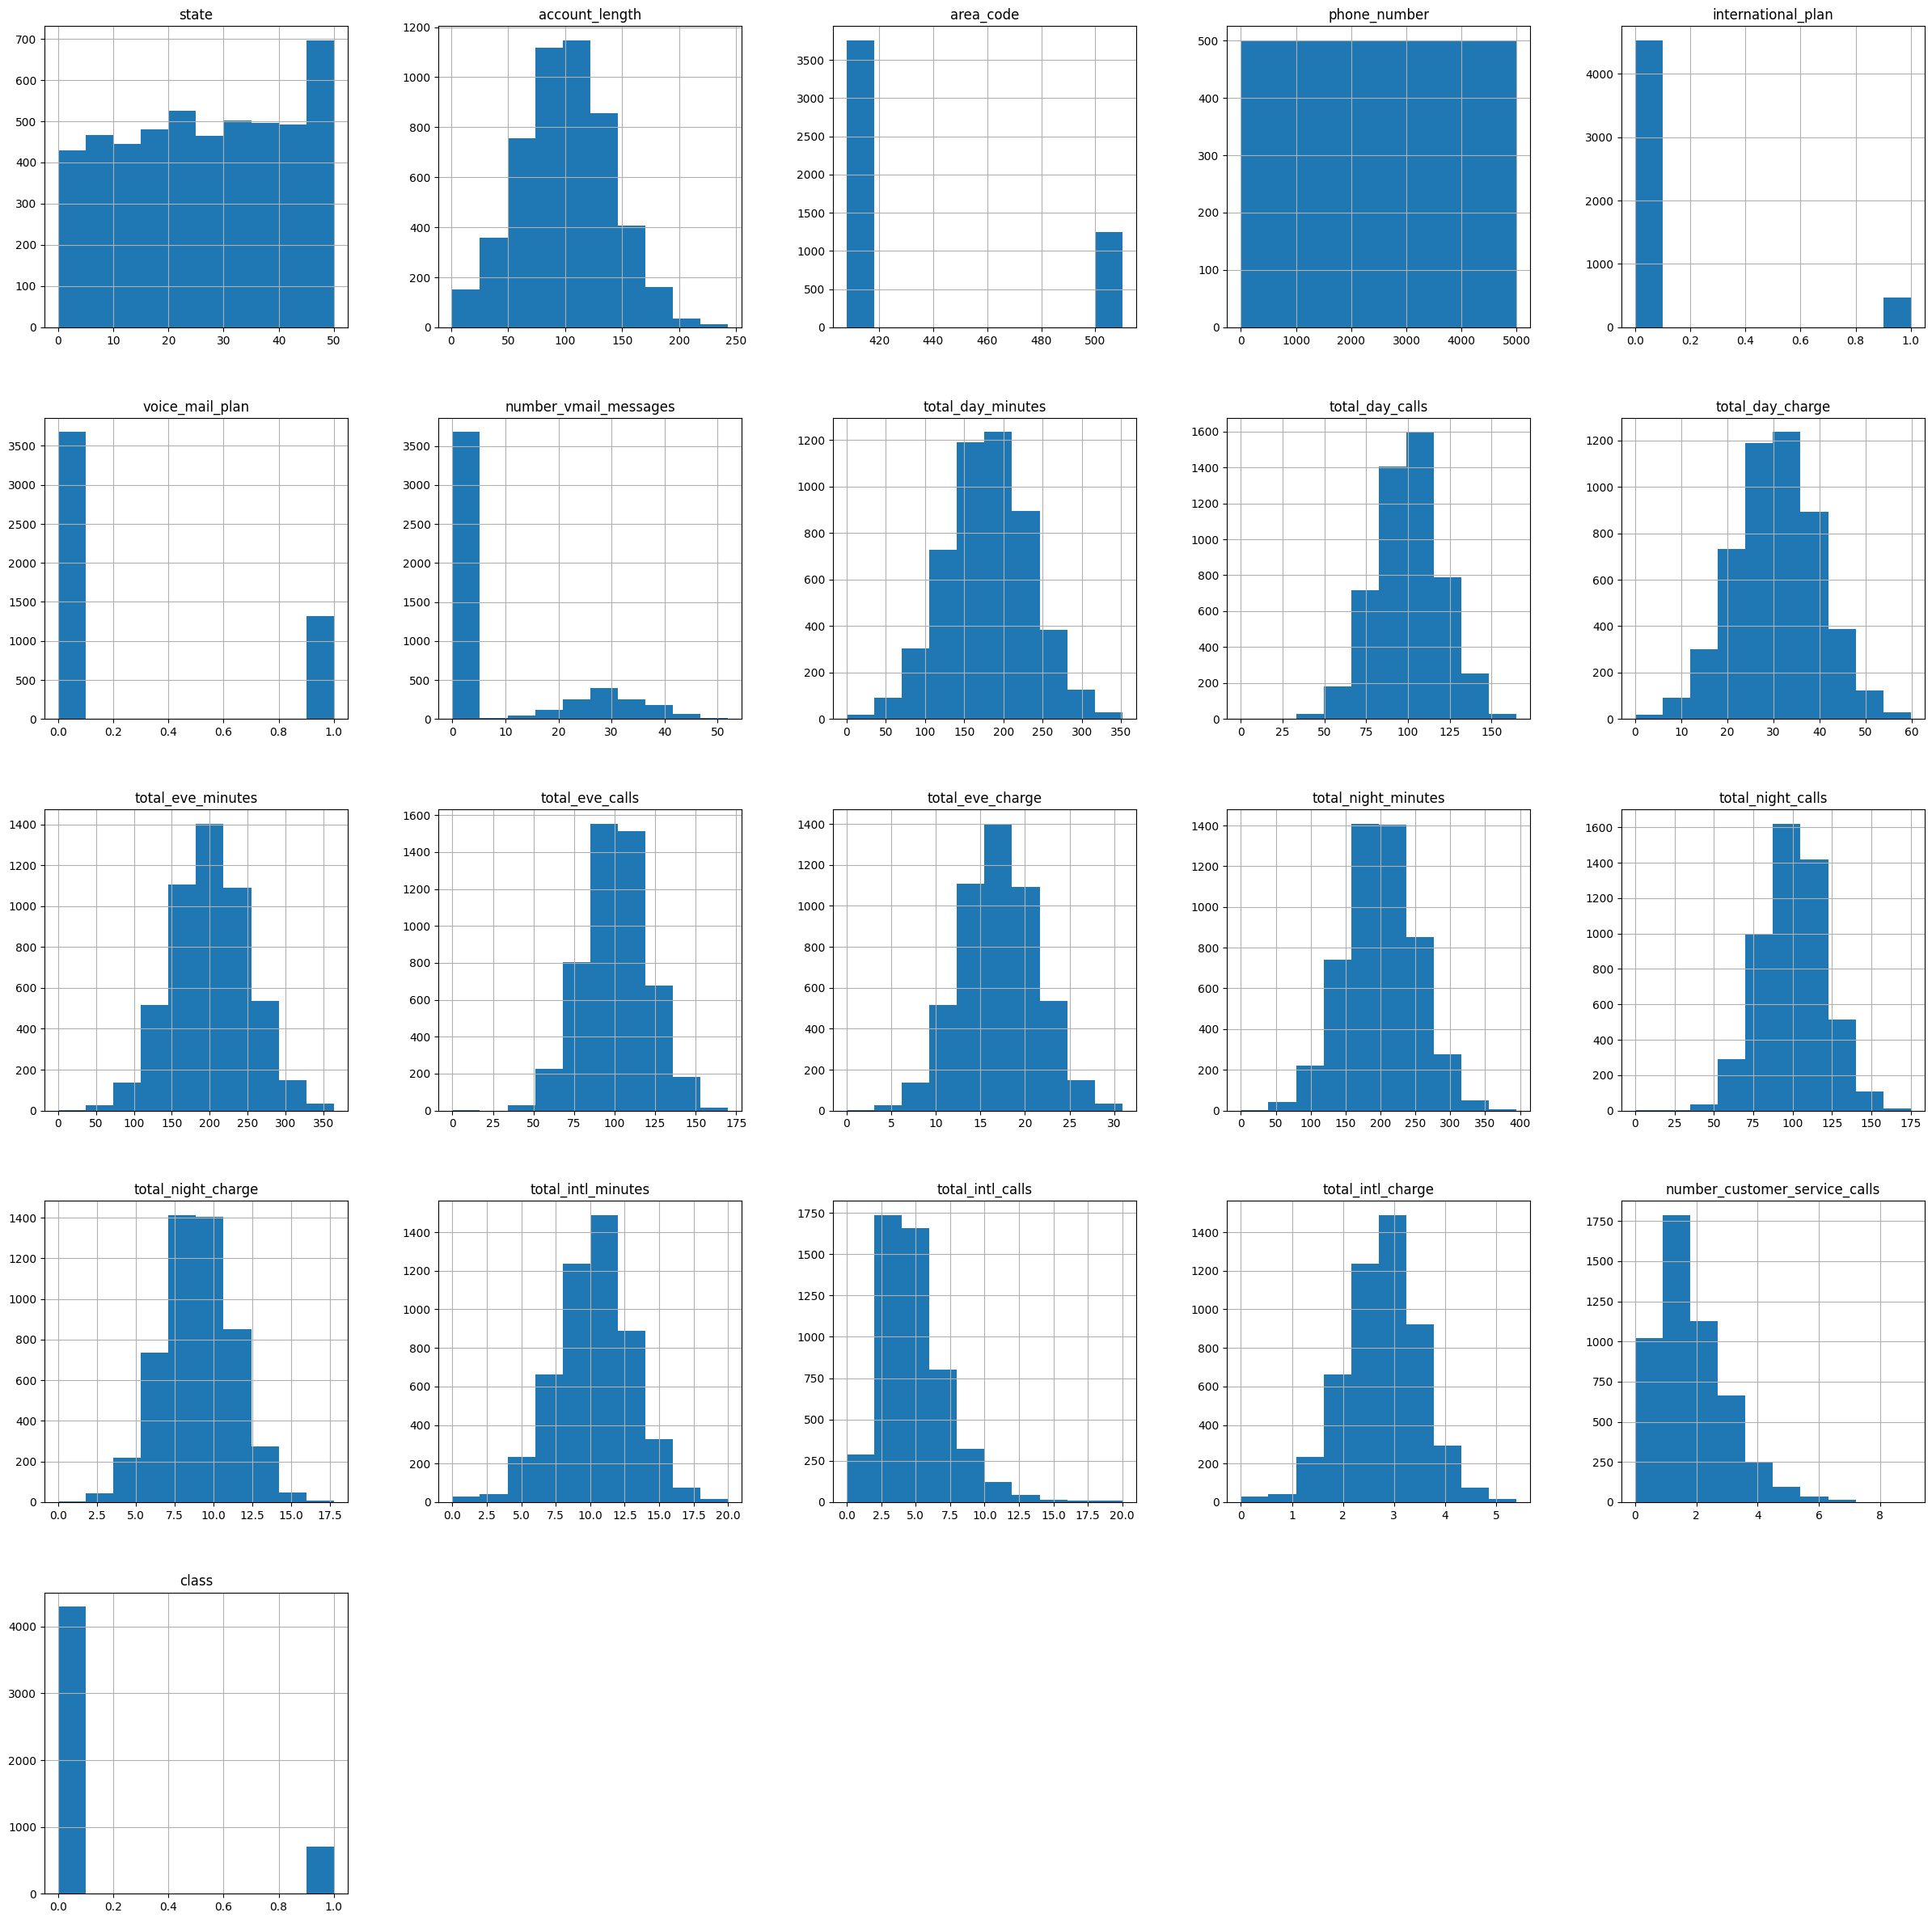

In [10]:
telecom_df.hist(figsize = (30, 30))
plt.show()

In [11]:
telecom_df["class"].value_counts()

,count
class,
0,4293
1,707


<Axes: ylabel='count'>

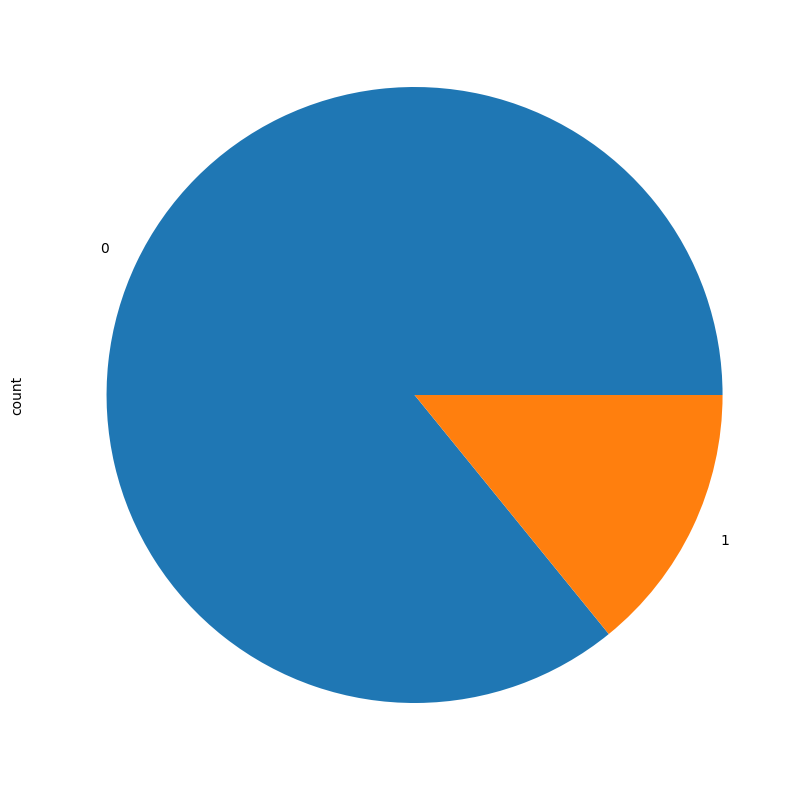

In [12]:
plt.figure(figsize = [10, 10])
telecom_df["class"].value_counts().plot(kind='pie')

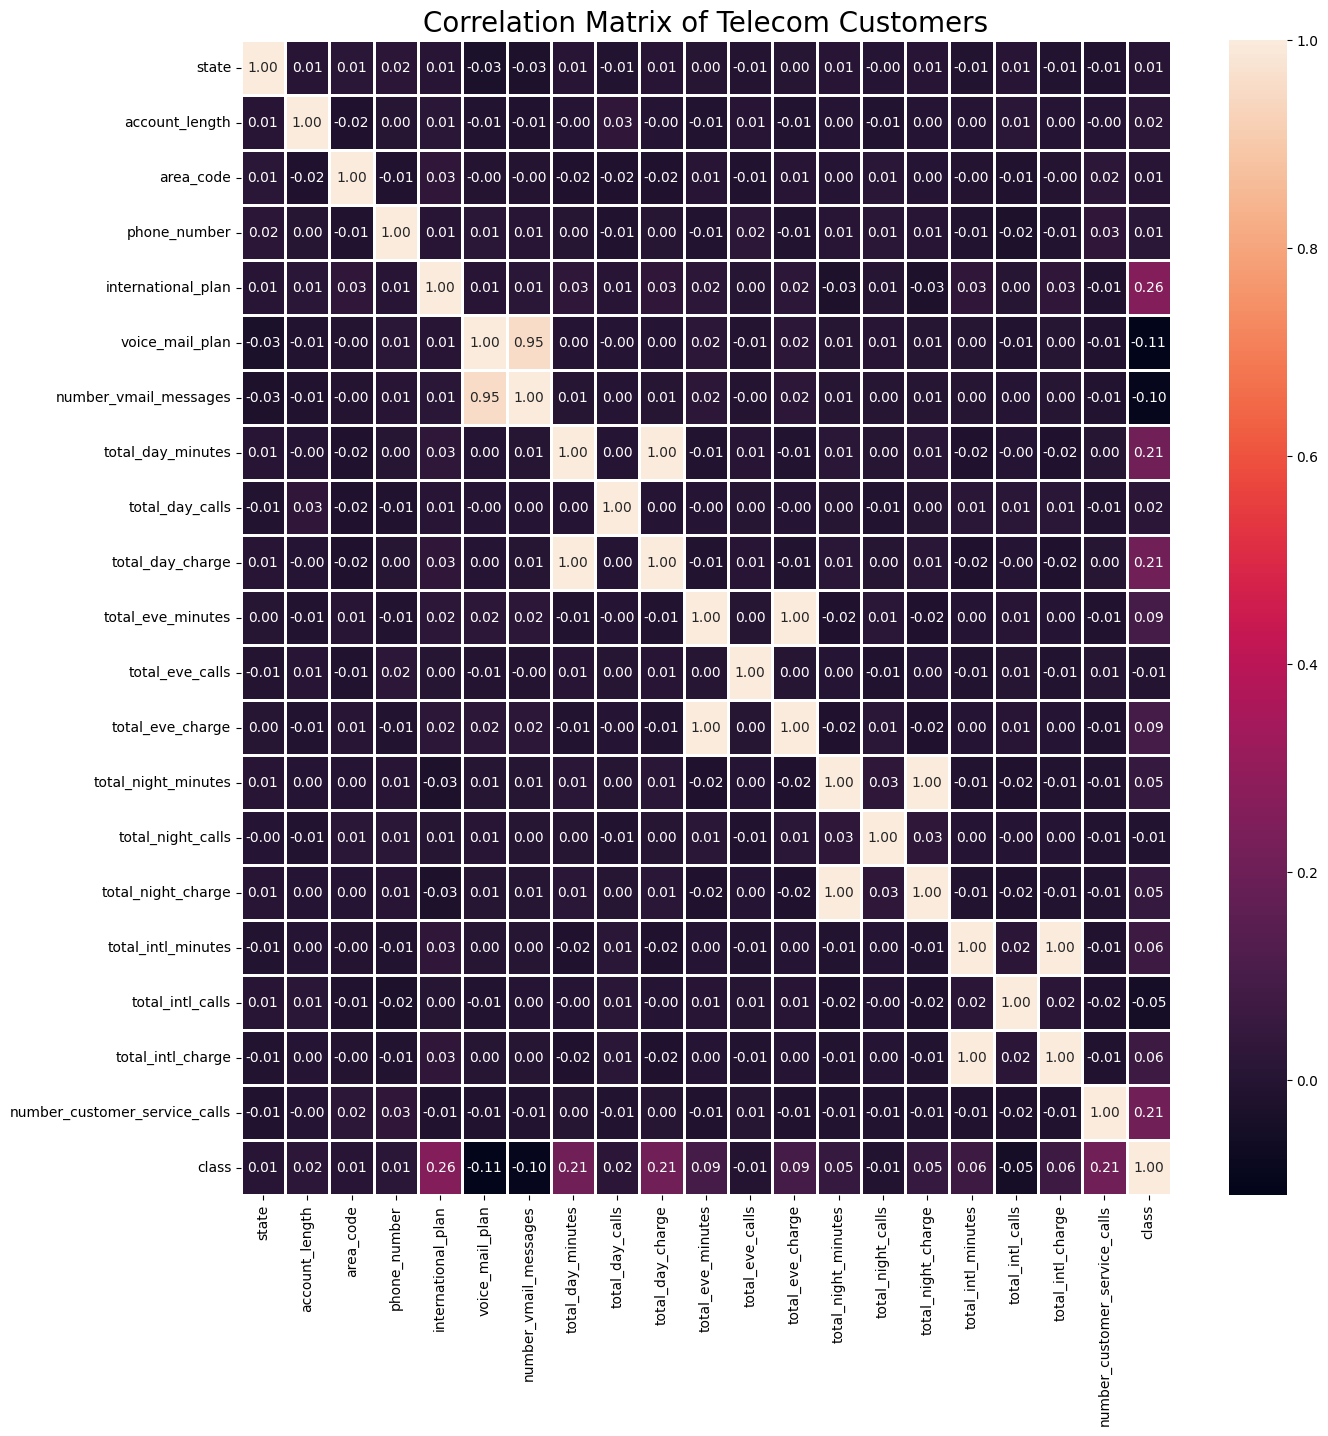

In [14]:
# Корреляционная матрица
corr_matrix = telecom_df.corr()
plt.figure(figsize = (15, 15))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True,
               fmt = ".2f")
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

# "voice_mail_plan" и "number_vmail_messages" сильно коррелируют.
#  «общий дневной заряд» и «общее количество ежедневных минут» сильно коррелируют.

<ipython-input-15-9696565956f9>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
<ipython-input-15-9696565956f9>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],


Text(0.5, 1.0, 'Distribution of day charges by churn')

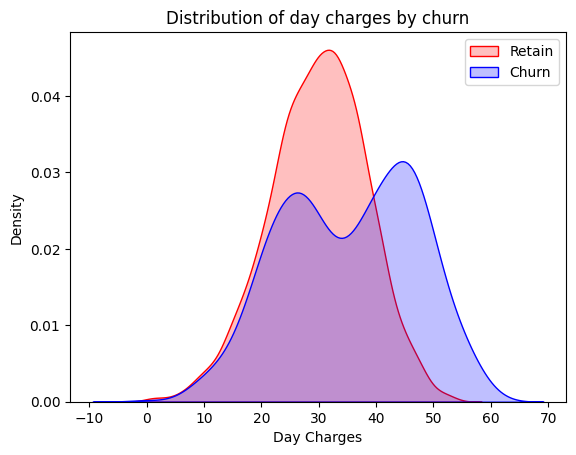

In [15]:
# Плата за отток по дням
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

ОПРЕДЕЛЕНИЕ ВАЖНОСТИ ПРИЗНАКОВ И ПОДГОТОВКА ДАННЫХ ПЕРЕД ОБУЧЕНИЕМ МОДЕЛИ

In [16]:
# Ненужные функции снизят скорость обучения, интерпретируемость модели и производительность обобщения на тестовых данных.
# Поэтому поиск и выбор наиболее полезных функций в наборе данных имеет решающее значение.
# Присвоение входных характеристик X и выходных (Churn) y

X = telecom_df.drop(["class", "area_code", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = telecom_df["class"]

In [17]:
X.shape

(5000, 18)

In [18]:
y.shape

(5000,)

In [20]:
# Выполнение тренировочного сплита
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 150)

In [21]:
X_train.shape

(3500, 18)

In [22]:
X_test.shape

(1500, 18)

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

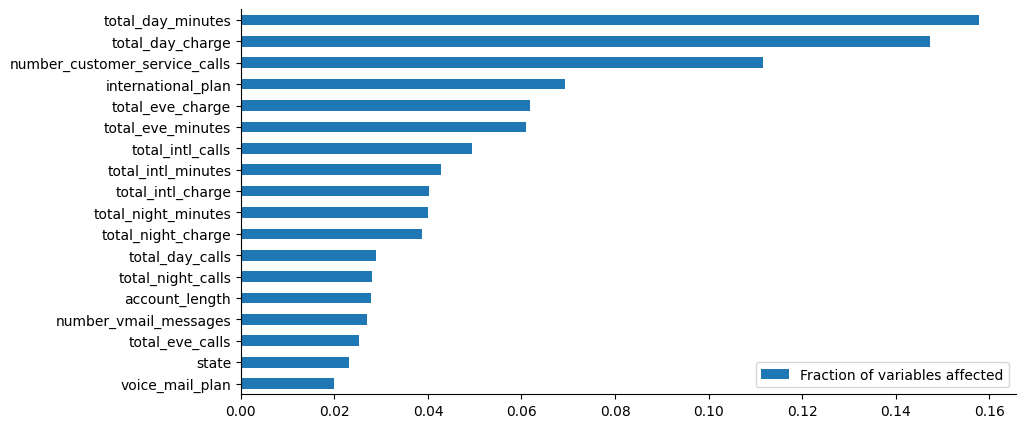

In [24]:
# Построение графика важности функции

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

In [25]:
# Приведенный выше график сгенерирован алгоритмом Random Forest
# График показывает, что «total_day_minutes» возглавляет список важных функций, за ним следует «total_day_minutes» и так далее.

ОБУЧЕНИЕ И ОЦЕНКА КЛАССИФИКАТОРА ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()

model_LR.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_predict = model_LR.predict(X_test)

In [29]:
print(classification_report(y_test, y_predict))
# точность - это отношение TP/(TP+FP)
# recall - это отношение TP/(TP+FN)
# F-beta score можно интерпретировать как взвешенное гармоническое среднее точности и полноты
# где оценка F-beta достигает своего лучшего значения в 1 и худшего в 0.


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1299
           1       0.42      0.09      0.15       201

    accuracy                           0.86      1500
   macro avg       0.65      0.54      0.54      1500
weighted avg       0.81      0.86      0.82      1500



ОБУЧЕНИЕ И ОЦЕНКА КЛАССИФИКАТОРА МЕТОДА ОПОРНЫХ ВЕКТОРОВ

In [31]:
from sklearn.calibration import CalibratedClassifierCV # Для вывода оценки вероятности
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=100000)
model_svm = CalibratedClassifierCV(model_svc)
model_svm.fit(X_train, y_train)

CalibratedClassifierCV(estimator=LinearSVC(max_iter=100000))

In [32]:
y_predict = model_svm.predict(X_test)

In [33]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1299
           1       0.47      0.18      0.27       201

    accuracy                           0.86      1500
   macro avg       0.68      0.58      0.59      1500
weighted avg       0.83      0.86      0.84      1500



<Axes: >

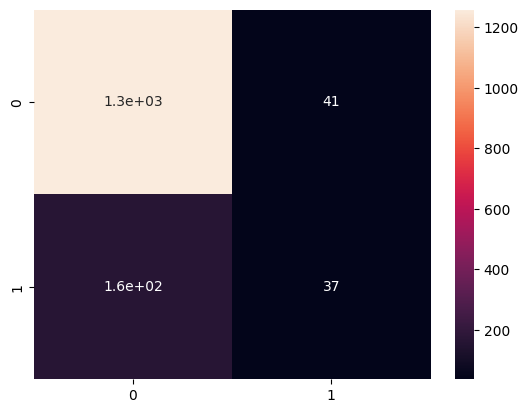

In [34]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

ОБУЧЕНИЕ И ОЦЕНКА СЛУЧАЙНОГО КЛАССИФИКАТОРА RandomForest

In [37]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
y_predict = model_rf.predict(X_test)

In [38]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1299
           1       0.91      0.74      0.82       201

    accuracy                           0.96      1500
   macro avg       0.94      0.86      0.90      1500
weighted avg       0.95      0.96      0.95      1500



<Axes: >

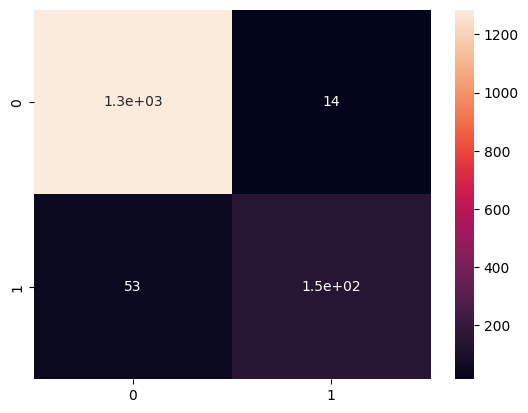

In [39]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

ОБУЧЕНИЕ И ОЦЕНКА KNeighborsClassifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_predict = model_knn.predict(X_test)

In [42]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1299
           1       0.67      0.25      0.37       201

    accuracy                           0.88      1500
   macro avg       0.78      0.62      0.65      1500
weighted avg       0.86      0.88      0.86      1500



<Axes: >

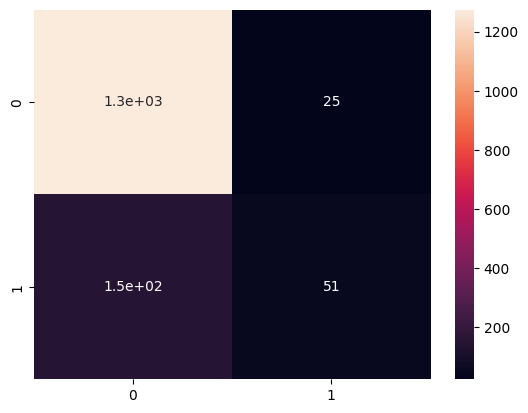

In [43]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

ОБУЧЕНИЕ И ОЦЕНКА naive_bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [46]:
y_predict = model_gnb.predict(X_test)

In [47]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1299
           1       0.53      0.52      0.52       201

    accuracy                           0.87      1500
   macro avg       0.73      0.72      0.72      1500
weighted avg       0.87      0.87      0.87      1500



<Axes: >

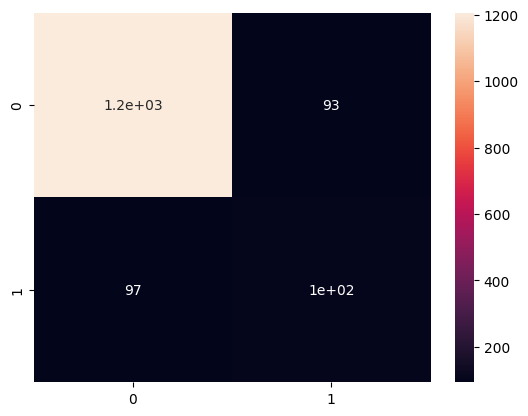

In [48]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

СРАВНЕНИЕ ОБУЧЕННЫХ МОДЕЛЕЙ КЛАССИФИКАТОРОВ И ЗАКЛЮЧИТЕЛЬНЫХ ЗАМЕЧАНИЙ

Check this out: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [49]:
model_LR.predict_proba(X_test)
# The first element is the probability that the output will be 0
# The second element is the probabiliy that the output will be 1

array([[0.97090084, 0.02909916],
       [0.91420017, 0.08579983],
       [0.89732832, 0.10267168],
       ...,
       [0.92534431, 0.07465569],
       [0.94498249, 0.05501751],
       [0.97334898, 0.02665102]])

In [50]:
model_LR.predict_proba(X_test)[:, 1]

array([0.02909916, 0.08579983, 0.10267168, ..., 0.07465569, 0.05501751,
       0.02665102])

In [51]:
y_test

,class
4827,0
1793,0
2957,0
4218,0
2188,0
...,...
4230,1
3824,0
262,0
1100,0


In [52]:
fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [53]:
fpr1

array([0.00000000e+00, 7.69822941e-04, 7.69822941e-04, 1.53964588e-03,
       1.53964588e-03, 3.07929176e-03, 3.07929176e-03, 4.61893764e-03,
       4.61893764e-03, 7.69822941e-03, 7.69822941e-03, 9.23787529e-03,
       9.23787529e-03, 1.38568129e-02, 1.38568129e-02, 1.53964588e-02,
       1.53964588e-02, 1.69361047e-02, 1.69361047e-02, 1.77059276e-02,
       1.77059276e-02, 1.84757506e-02, 1.84757506e-02, 1.92455735e-02,
       1.92455735e-02, 2.15550423e-02, 2.15550423e-02, 2.69438029e-02,
       2.69438029e-02, 2.92532717e-02, 2.92532717e-02, 3.07929176e-02,
       3.07929176e-02, 3.31023865e-02, 3.31023865e-02, 4.15704388e-02,
       4.15704388e-02, 4.31100847e-02, 4.31100847e-02, 4.38799076e-02,
       4.38799076e-02, 4.46497306e-02, 4.46497306e-02, 4.77290223e-02,
       4.77290223e-02, 4.92686682e-02, 4.92686682e-02, 5.00384911e-02,
       5.00384911e-02, 5.15781370e-02, 5.15781370e-02, 5.31177829e-02,
       5.31177829e-02, 5.46574288e-02, 5.46574288e-02, 5.54272517e-02,
      

In [54]:
tpr1

array([0.        , 0.        , 0.00497512, 0.00497512, 0.00995025,
       0.00995025, 0.01492537, 0.01492537, 0.02487562, 0.02487562,
       0.03482587, 0.03482587, 0.039801  , 0.039801  , 0.04477612,
       0.04477612, 0.06467662, 0.06467662, 0.07960199, 0.07960199,
       0.08457711, 0.08457711, 0.08955224, 0.08955224, 0.09452736,
       0.09452736, 0.09950249, 0.09950249, 0.11442786, 0.11442786,
       0.12437811, 0.12437811, 0.12935323, 0.12935323, 0.13432836,
       0.13432836, 0.13930348, 0.13930348, 0.14925373, 0.14925373,
       0.16915423, 0.16915423, 0.17412935, 0.17412935, 0.17910448,
       0.17910448, 0.1840796 , 0.1840796 , 0.18905473, 0.18905473,
       0.2039801 , 0.2039801 , 0.20895522, 0.20895522, 0.21393035,
       0.21393035, 0.21890547, 0.21890547, 0.2238806 , 0.2238806 ,
       0.22885572, 0.22885572, 0.23383085, 0.23383085, 0.23880597,
       0.23880597, 0.24378109, 0.24378109, 0.25373134, 0.25373134,
       0.26865672, 0.26865672, 0.27363184, 0.27363184, 0.27860

In [55]:
thresh1

array([       inf, 0.83718078, 0.83552083, 0.80723282, 0.77142746,
       0.74205639, 0.73494222, 0.7236086 , 0.70358745, 0.65315047,
       0.63656504, 0.61947471, 0.61554038, 0.58556899, 0.57797044,
       0.53895311, 0.52588326, 0.52182068, 0.51291433, 0.51113246,
       0.50912355, 0.50692748, 0.50689259, 0.50374958, 0.50370617,
       0.49401528, 0.49322224, 0.46184889, 0.45904783, 0.4527665 ,
       0.44864716, 0.44376623, 0.44178555, 0.43349381, 0.43014821,
       0.41385401, 0.41382783, 0.40759161, 0.40483003, 0.40294902,
       0.38924141, 0.38613169, 0.38323606, 0.378636  , 0.37853   ,
       0.37580479, 0.37297966, 0.37174821, 0.3709667 , 0.3696228 ,
       0.36504568, 0.36356087, 0.36311555, 0.36223081, 0.35846139,
       0.35695172, 0.3566691 , 0.35253409, 0.35187721, 0.3479784 ,
       0.34752932, 0.34040957, 0.33958075, 0.33754871, 0.33745185,
       0.33231731, 0.33157231, 0.32869329, 0.32559731, 0.32104525,
       0.32053883, 0.32012779, 0.31889746, 0.31817595, 0.31805

In [56]:
# кривая ROC
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [58]:
# оценка AUC

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Логистическая регрессия
print("Support Vector Machine: ", auc_score2) # Метод опорных векторов
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.6993554169108269
Support Vector Machine:  0.7988310947188615
Random Forest:  0.9154918249399653
K-Nearest Neighbors:  0.6563123566156898
Naive Bayes:  0.8270158062650564


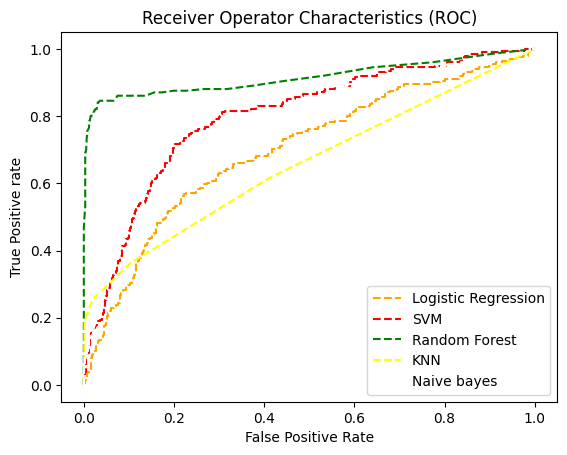

In [59]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

График показывает, что алгоритм Random Forest показал наилучшую AUC. Таким образом, очевидно, что модель Random Forest лучше справляется с классификацией отточенных/удержанных клиентов телекоммуникационных услуг.

In [60]:
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1299
           1       0.94      0.75      0.83       201

    accuracy                           0.96      1500
   macro avg       0.95      0.87      0.91      1500
weighted avg       0.96      0.96      0.96      1500



Среди всех обученных моделей алгоритм Random Forest Classifier показал самую высокую площадь под кривой ROC (AUC).

Следующие оценки являются результатами модели классификатора случайных лесов

Точность: ~96% точность этикетки
Точность: ~96% помечено как «Удержанные клиенты» и ~94% помечено как «Ушедшие клиенты»
Отзыв: ~99% помечены как «Удержанные клиенты» и ~76% помечены как «Ушедшие клиенты»
Примечание: Мы можем еще лучше улучшить эту модель, используя метод "Поиск по сетке".



 ИТОГОВЫЕ

Этот набор данных содержит информацию о просроченных платежах, демографических факторах, кредитных данных, истории платежей и выписках по счетам клиентов кредитных карт на Тайване с апреля 2005 года по сентябрь 2005 года.


Все 25 переменных:

- ID: ID каждого клиента
- LIMIT_BAL: Сумма предоставленного кредита в NT долларах (включая индивидуальный и семейный/дополнительный кредит)
- SEX: пол (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Семейное положение (1=married, 2=single, 3=others)
- AGE: Возраст в годах
- PAY_0: Статус погашения по состоянию на сентябрь 2005 года (-1=оплата в срок, 1=задержка платежа на один месяц, 2=задержка платежа на два месяца, ... 8=задержка платежа на восемь месяцев, 9=отсрочка платежа на девять месяцев и более)

- PAY_2: Статус погашения по состоянию на август 2005 года (масштаб аналогичен выше)
- PAY_3: RСтатус погашения по состоянию на июль 2005 года (шкала аналогична вышеуказанной)
- PAY_4: Статус погашения по состоянию на июнь 2005 года (масштаб аналогичен выше)
- PAY_5: Статус погашения по состоянию на май 2005 года (масштаб аналогичен выше)
- PAY_6: Статус погашения по состоянию на апрель 2005 года (шкала аналогична вышеуказанной)
- BILL_AMT1: Сумма выписки по счету в сентябре 2005 года (NT доллары)
- BILL_AMT2: Сумма выписки по счету в августе 2005 года (NT доллары)
- BILL_AMT3: Сумма выписки по счету в июле 2005 года (NT доллары)
- BILL_AMT4: Сумма выписки по счету в июне 2005 года (NT доллары)
- BILL_AMT5: Сумма выписки по счету за май 2005 года
- BILL_AMT6: Сумма выписки по счету в апреле 2005 года (NT доллары)
- PAY_AMT1: Сумма предыдущего платежа в сентябре 2005 года
- PAY_AMT2: Сумма предыдущего платежа в августе 2005 года
- PAY_AMT3: Сумма предыдущего платежа в июле 2005 года
- PAY_AMT4: Сумма предыдущего платежа в июне 2005 г.
- PAY_AMT5: Сумма предыдущего платежа в мае 2005 года
- PAY_AMT6: Сумма предыдущего платежа в апреле 2005 года (NT доллары)
default.payment.next.month: Платеж по умолчанию (1=да, 0=нет




Практические Работы на датасете
Найти максимальное и среднее количество минут в день

In [61]:
# Display the statistical details of the dataframe
telecom_df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


График KDE, показывающий вечерние платежи как для удержанных, так и для ушедших клиентов

In [ ]:
# Churn by evening charges
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

**PRACTICE OPPORTUNITY #3 SOLUTION:**
- **Print out the confusion Matrix and comment on the results**


In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

**PRACTICE OPPORTUNITY #4 SOLUTION:**
- **Which of the following answers represent the Euclidean distance between the two points A(1, 3) and B(2, 3)?**

1. 2
2. 4
3. 1
4. 8

sqrt((1-2)^2 + (3-3)^2)= 1

# FINAL CAPSTONE PROJECT SOLUTION

# FINAL PROJECT TASK #1: IMPORT LIBRARIES/DATASETS AND PERFORM EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# You have to include the full link to the csv file containing your dataset
creditcard_df = pd.read_csv('UCI_Credit_Card.csv')


In [ ]:
creditcard_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
# 24 features in total, each contains 30000 data points
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
creditcard_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


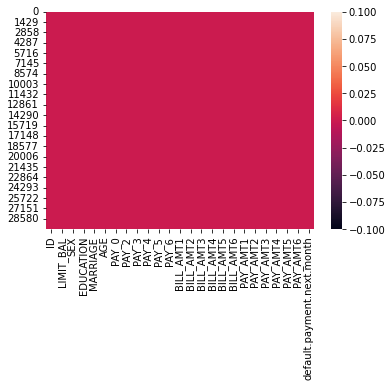

In [ ]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(creditcard_df.isnull());

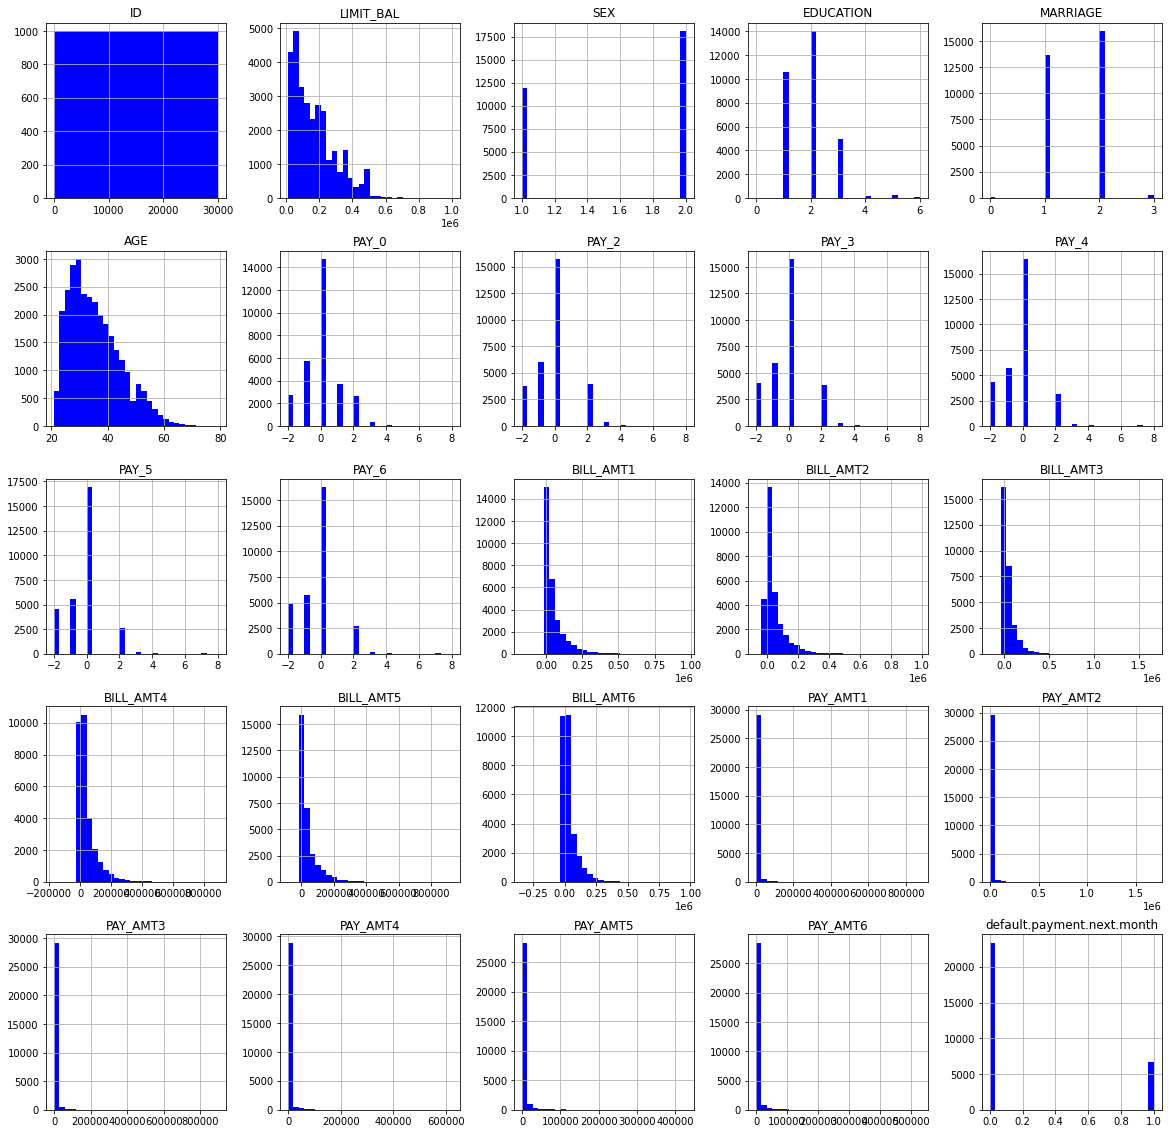

In [ ]:
# Plot Histogram
creditcard_df.hist(bins = 30, figsize = (20,20), color = 'b');

In [ ]:
# Let's drop the ID column
creditcard_df.drop(['ID'], axis = 1, inplace = True)

In [ ]:
creditcard_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
# Let's see how many customers could potentially default on their credit card payment!
cc_default_df        = creditcard_df[creditcard_df['default.payment.next.month'] == 1]
cc_nodefault_df      = creditcard_df[creditcard_df['default.payment.next.month'] == 0]


In [ ]:
cc_default_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
13,70000.0,1,2,2,30,1,2,2,0,0,...,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1
16,20000.0,1,1,2,24,0,0,2,2,2,...,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1
21,120000.0,2,2,1,39,-1,-1,-1,-1,-1,...,0.0,632.0,316.0,316.0,316.0,0.0,632.0,316.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,210000.0,1,2,1,34,3,2,2,2,2,...,2500.0,2500.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29994,80000.0,1,2,2,34,2,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
cc_nodefault_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,500000.0,1,1,2,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,140000.0,1,2,1,41,0,0,0,0,0,...,138262.0,49675.0,46121.0,6000.0,7000.0,4228.0,1505.0,2000.0,2000.0,0
29992,10000.0,1,3,1,43,0,0,0,-2,-2,...,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0
29993,100000.0,1,1,2,38,0,-1,-1,0,0,...,70626.0,69473.0,55004.0,2000.0,111784.0,4000.0,3000.0,2000.0,2000.0,0
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0


In [ ]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset

print("Total =", len(creditcard_df))

print("Number of customers who defaulted on their credit card payments =", len(cc_default_df))
print("Percentage of customers who defaulted on their credit card payments =", 1.*len(cc_default_df)/len(creditcard_df)*100.0, "%")

print("Number of customers who did not default on their credit card payments (paid their balance)=", len(cc_nodefault_df))
print("Percentage of customers who did not default on their credit card payments (paid their balance)=", 1.*len(cc_nodefault_df)/len(creditcard_df)*100.0, "%")

Total = 30000
Number of customers who defaulted on their credit card payments = 6636
Percentage of customers who defaulted on their credit card payments = 22.12 %
Number of customers who did not default on their credit card payments (paid their balance)= 23364
Percentage of customers who did not default on their credit card payments (paid their balance)= 77.88000000000001 %


In [ ]:
# Let's compare the mean and std of the customers who stayed and left
cc_default_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,...,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.0
mean,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.0
std,115378.540571,0.495520,0.728096,0.525433,9.693438,1.383252,1.502243,1.499401,1.508535,1.482833,...,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894,0.0
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000,1.0
75%,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,0.000000,...,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000,1.0
max,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000,1.0


In [ ]:
# Let's compare the mean and std of the customers who stayed and left
cc_nodefault_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,...,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000,23364.0
mean,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,43611.165254,40530.445343,39042.268704,6307.337357,6.640465e+03,5753.496833,5300.529319,5248.220296,5719.371769,0.0
std,131628.359660,0.486806,0.806780,0.520794,9.077355,0.952464,1.035191,1.048378,1.013162,0.977591,...,64324.796730,60617.268112,59547.015717,18014.508990,2.530226e+04,18684.255937,16689.778060,16071.667860,18792.950473,0.0
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,70000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1823.000000,1265.500000,1163.750000,1.005000e+03,600.000000,390.000000,369.000000,300.000000,0.0
50%,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,17998.000000,16679.000000,2459.500000,2.247500e+03,2000.000000,1734.000000,1765.000000,1706.000000,0.0
75%,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55988.000000,51135.250000,49842.500000,5606.250000,5.311250e+03,5000.000000,4602.000000,4600.000000,4545.000000,0.0
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,0.0


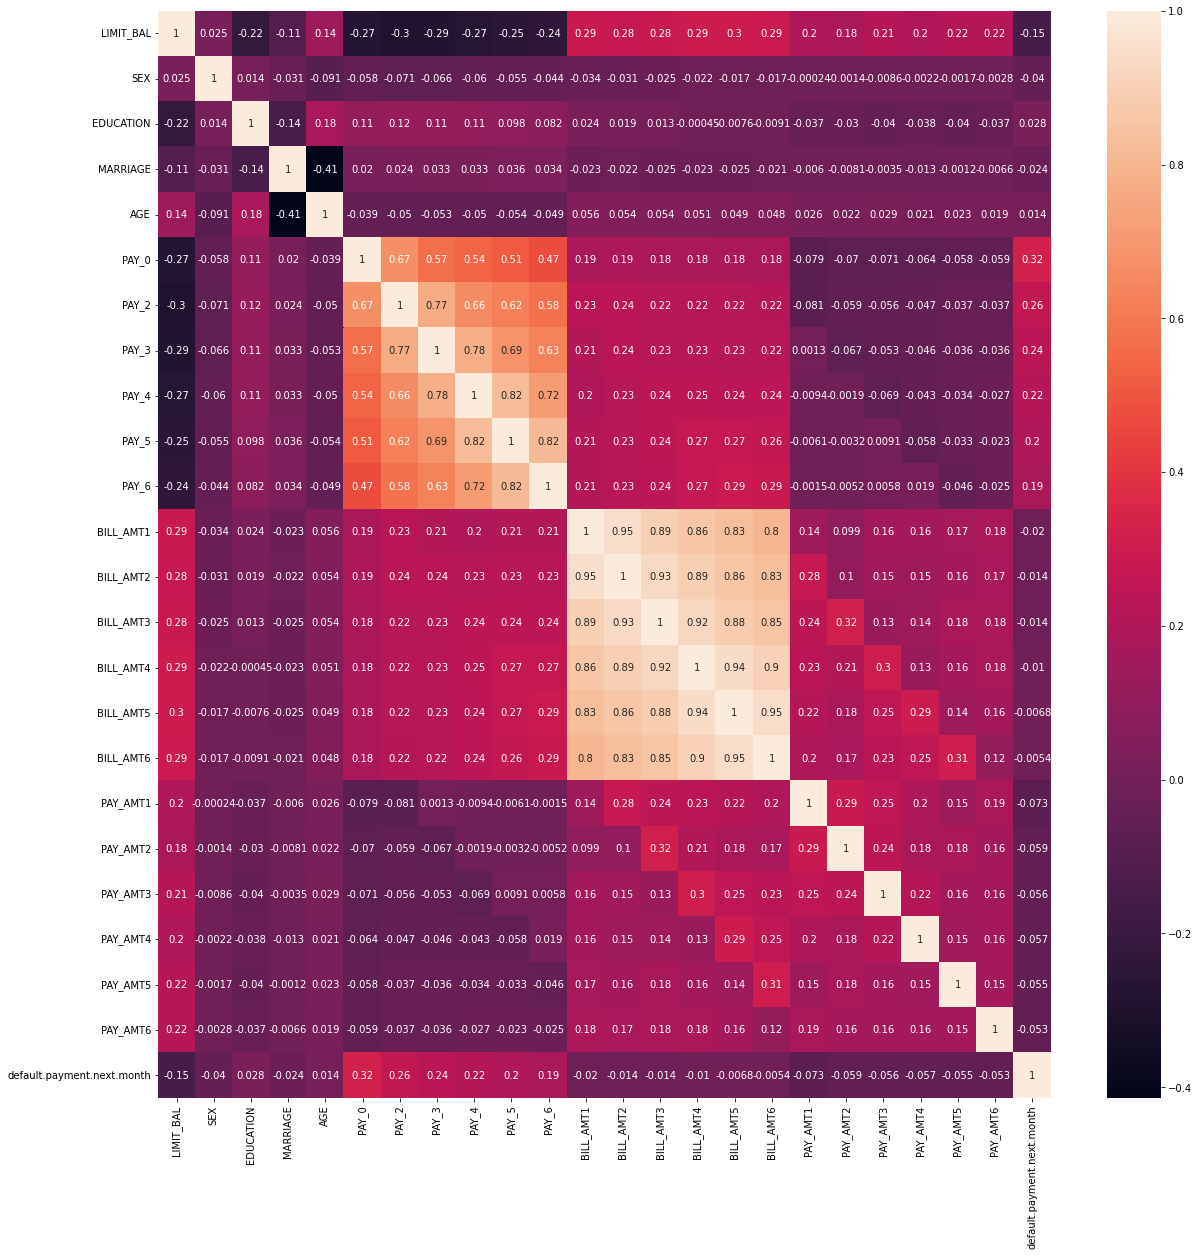

In [ ]:
# Plot the correlation matrix
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True);

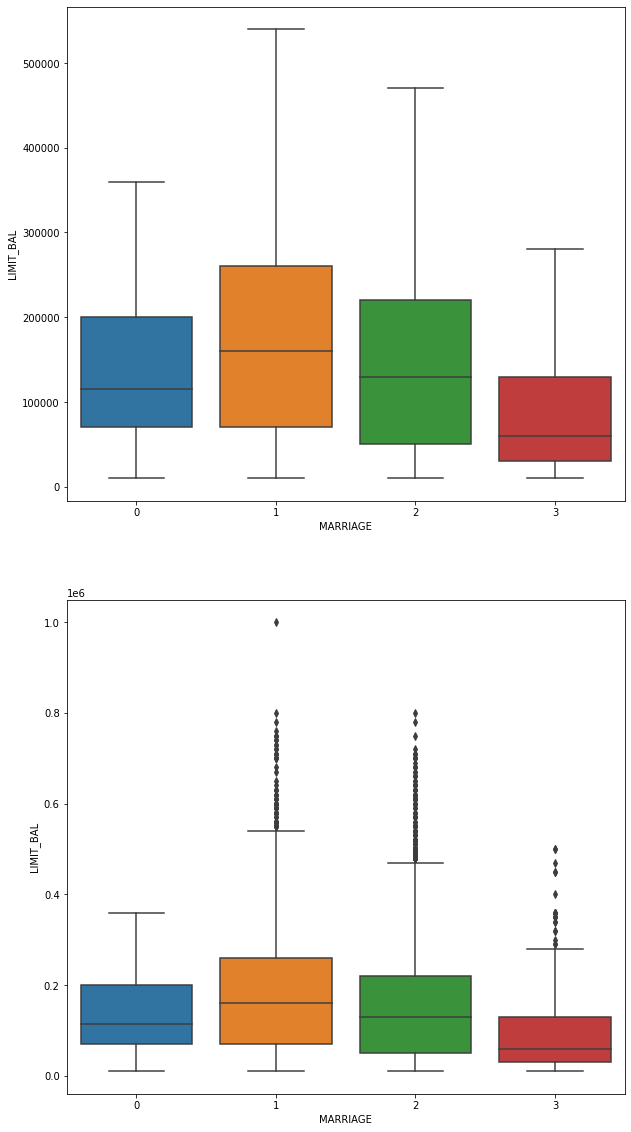

In [ ]:
plt.figure(figsize=[10,20])
plt.subplot(211)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = creditcard_df, showfliers = False);
plt.subplot(212)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = creditcard_df);


# FINAL PROJECT TASK #2: PREPARE TRAINING AND TESTING DATASET

In [ ]:
X_cat = creditcard_df[['SEX', 'EDUCATION', 'MARRIAGE']]
X_cat

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1
...,...,...,...
29995,1,3,1
29996,1,3,2
29997,1,2,2
29998,1,3,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [ ]:
X_cat.shape

(30000, 13)

In [ ]:
X_cat = pd.DataFrame(X_cat)

In [ ]:
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# note that we dropped the target 'default.payment.next.month'
X_numerical = creditcard_df[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
X_numerical

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [ ]:
X = pd.concat([X_cat, X_numerical], axis = 1)
X

,0,1,2,3,4,5,6,7,8,9,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
y = creditcard_df['default.payment.next.month']
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape

(24000, 33)

In [ ]:
X_test.shape

(6000, 33)

# FINAL PROJECT TASK #3: TRAIN AN XG-BOOST CLASSIFIER MODEL

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Train an XGBoost classifier model
import xgboost as xgb
model_xgb = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 20, use_label_encoder = False)
model_xgb.fit(X_train, y_train)

XGBClassifier(max_depth=20, use_label_encoder=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_predict = model_xgb.predict(X_test)

In [ ]:
y_predict

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_test

17497    0
10778    0
17981    0
12665    0
17264    1
        ..
3398     0
25671    0
20737    0
14104    0
12464    0
Name: default.payment.next.month, Length: 6000, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("Accuracy {} %".format( 100 * accuracy_score(y_predict, y_test)))

Accuracy 81.5 %


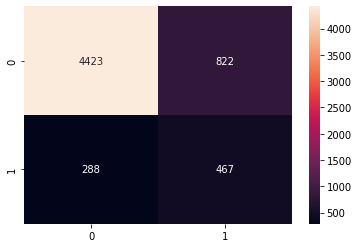

In [ ]:
# Model Performance on the Testing dataset
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd');

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4711
           1       0.62      0.36      0.46      1289

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.80      6000



# FINAL PROJECT TASK #4: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [ ]:
X_train

array([[1.        , 0.        , 0.        , ..., 0.01372947, 0.00947415,
        0.01799056],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.03753623, 0.00526107,
        0.00407819],
       ...,
       [1.        , 0.        , 0.        , ..., 0.01300483, 0.03030744,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02979549, 0.01207655,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.00586127,
        0.        ]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression(max_iter = 10000)
model_LR.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_predict = model_LR.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0.


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4711
           1       0.68      0.23      0.34      1289

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.61      6000
weighted avg       0.79      0.81      0.77      6000



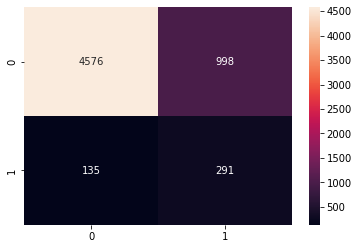

In [ ]:
# Model Performance on the Testing dataset
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd');

# FINAL PROJECT TASK #5: TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

In [ ]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=1000)
model_svm = CalibratedClassifierCV(model_svc)
model_svm.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC())

In [ ]:
y_predict = model_svm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4711
           1       0.67      0.23      0.34      1289

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



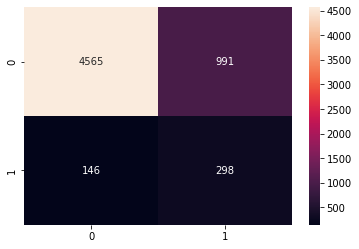

In [ ]:
# Model Performance on the Testing dataset
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd');

# FINAL PROJECT TASK #6: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_predict = model_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4711
           1       0.63      0.38      0.47      1289

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



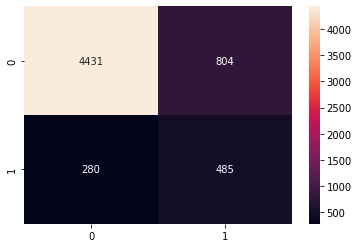

In [ ]:
# Model Performance on the Testing dataset
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd');

# FINAL PROJECT TASK #7: TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predict = model_knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      4711
           1       0.53      0.33      0.41      1289

    accuracy                           0.79      6000
   macro avg       0.68      0.63      0.64      6000
weighted avg       0.77      0.79      0.78      6000



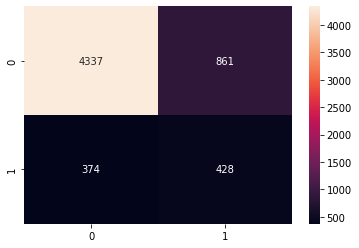

In [ ]:
# Model Performance on the Testing dataset
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd');

# FINAL PROJECT TASK #8: TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_predict = model_gnb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.09      0.16      4711
           1       0.22      0.96      0.36      1289

    accuracy                           0.28      6000
   macro avg       0.56      0.52      0.26      6000
weighted avg       0.75      0.28      0.21      6000



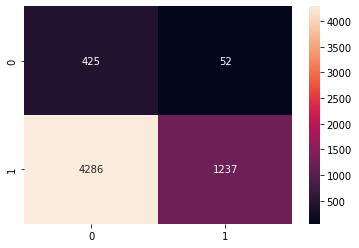

In [ ]:
# Model Performance on the Testing dataset
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd');

# FINAL PROJECT TASK #9: PLOT ROC CURVES FOR THE 5 MODELS AND FIND AUC SCORES

Check this out: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve

fpr0, tpr0, thresh0 = roc_curve(y_test, model_xgb.predict_proba(X_test)[:, 1], pos_label = 1)
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [ ]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score0 = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1])
auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("XG-Boost Classifier: ", auc_score0) # XG-Boost
print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

XG-Boost Classifier:  0.7597240764439037
Logistic Regression:  0.7192429154551214
Support Vector Machine:  0.7171763788726152
Random Forest:  0.7624289849335009
K-Nearest Neighbors:  0.6908410057902218
Naive Bayes:  0.7308548123427022


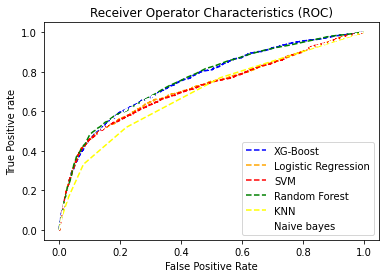

In [ ]:
plt.plot(fpr0, tpr0, linestyle = "--", color = "blue", label = "XG-Boost")
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()